In [1]:
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
%matplotlib inline

In [2]:
df = pd.read_csv('modelingdf.csv')
df = df.drop('Unnamed: 0', axis =1)

In [3]:
df.head()

,A,FC,G,GP,GS,MINS,OFF,R,SHTS,SOG,Y,season,club,position,next_year_compensation,name,current_compensation
0,0.0,7.0,0.0,8.0,5.0,460.0,3.0,0.0,8.0,3.0,0.0,2007,CLB,M,12900,brian plotkin,30000
1,4.0,28.0,3.0,30.0,11.0,1241.0,4.0,0.0,38.0,16.0,5.0,2007,CHI,F,63100,calen carr,50500
2,2.0,21.0,8.0,33.0,28.0,2181.0,37.0,0.0,65.0,41.0,3.0,2007,TFC,F,61273,chad barrett,48713
3,3.0,15.0,8.0,22.0,21.0,1721.0,5.0,0.0,44.0,22.0,1.0,2007,CHI,F,86075,chris rolfe,74700
4,0.0,43.0,1.0,26.0,24.0,2044.0,2.0,0.0,11.0,3.0,4.0,2007,CHI,D,44625,dasan robinson,42500


In [4]:
cluster_columns = ['A', 'FC', 'G', 'GP', 'GS', 'MINS', 'next_year_compensation']
dfstats = df[cluster_columns]

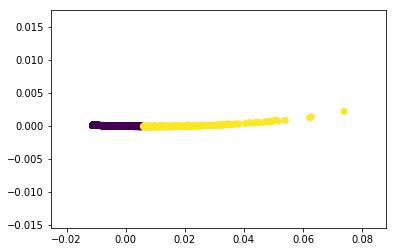

In [5]:
X_norm = normalize(dfstats)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
model1 = KMeans(n_clusters=2).fit(X_norm)
cluster_assignment_kmeans = model1.predict(X_norm)
plt.scatter(X_pca[:,0], X_pca[:,1], c = cluster_assignment_kmeans)

In [6]:
kmeanscluster1 = df[cluster_assignment_kmeans == 0]
kmeanscluster2 = df[cluster_assignment_kmeans == 1]

In [7]:
kmeanscluster1.describe()

,A,FC,G,GP,GS,MINS,OFF,R,SHTS,SOG,Y,season,next_year_compensation,current_compensation
count,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1.891000e+03,1.891000e+03
mean,2.158117,19.106293,2.409307,19.179270,15.444209,1382.537282,3.849286,0.181914,21.109466,7.886304,2.455315,2012.862507,3.074790e+05,2.855986e+05
std,3.202655,15.421411,3.924229,10.831764,11.078767,961.793952,6.966589,0.445686,24.919578,10.522301,2.399402,3.001785,7.001001e+05,7.013811e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1.290000e+04,1.290000e+04
25%,0.000000,7.000000,0.000000,10.000000,5.000000,512.500000,0.000000,0.000000,3.000000,1.000000,0.000000,2011.000000,9.312500e+04,8.420950e+04
50%,1.000000,16.000000,1.000000,20.000000,14.000000,1292.000000,1.000000,0.000000,12.000000,4.000000,2.000000,2013.000000,1.574370e+05,1.425000e+05
75%,3.000000,28.000000,3.000000,28.000000,25.000000,2195.500000,4.000000,0.000000,30.000000,11.000000,4.000000,2015.000000,2.500000e+05,2.266670e+05
max,50.000000,96.000000,31.000000,64.000000,64.000000,5592.000000,82.000000,3.000000,214.000000,71.000000,15.000000,2017.000000,7.115556e+06,7.115556e+06


In [8]:
kmeanscluster2.describe()

,A,FC,G,GP,GS,MINS,OFF,R,SHTS,SOG,Y,season,next_year_compensation,current_compensation
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,2.394456,26.102345,1.797441,26.916844,23.488273,2103.311301,3.447761,0.228145,20.313433,7.545842,3.547974,2011.031983,88351.582090,78538.162047
std,2.364275,12.351432,2.476279,6.882990,8.078565,696.993437,6.266512,0.481691,18.659850,8.368422,2.239014,2.888424,38485.366803,47011.868962
min,0.000000,4.000000,0.000000,8.000000,5.000000,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,12900.000000,12900.000000
25%,1.000000,18.000000,0.000000,23.000000,18.000000,1607.000000,0.000000,0.000000,8.000000,2.000000,2.000000,2009.000000,60000.000000,45625.000000
50%,2.000000,25.000000,1.000000,28.000000,24.000000,2132.000000,1.000000,0.000000,14.000000,4.000000,3.000000,2011.000000,84200.000000,66250.000000
75%,3.000000,34.000000,2.000000,31.000000,29.000000,2599.000000,3.000000,0.000000,26.000000,10.000000,5.000000,2013.000000,113333.000000,97963.000000
max,16.000000,82.000000,16.000000,68.000000,66.000000,5774.000000,40.000000,3.000000,100.000000,43.000000,12.000000,2017.000000,255000.000000,410000.000000


In [9]:
kmeanscluster1.club.value_counts(1)

DC       0.060814
LA       0.059757
CLB      0.058699
HOU      0.058170
RSL      0.057641
KC       0.056584
COL      0.054469
SJ       0.053940
DAL      0.053411
CHI      0.051824
SEA      0.046007
NE       0.043892
POR      0.042306
VAN      0.042306
PHI      0.040719
TOR      0.040190
CHV      0.031729
MTL      0.030672
NY       0.028027
ORL      0.019038
NYRB     0.018509
TFC      0.014278
NYCFC    0.012692
MNUFC    0.010576
ATL      0.007403
LAFC     0.004231
MLS      0.002115
Name: club, dtype: float64

In [10]:
kmeanscluster2.club.value_counts(1)

SJ       0.076759
NE       0.074627
DC       0.072495
COL      0.072495
DAL      0.066098
SEA      0.059701
KC       0.059701
HOU      0.059701
CHV      0.057569
RSL      0.053305
CHI      0.051173
CLB      0.042644
NY       0.042644
LA       0.038380
POR      0.031983
MTL      0.029851
TOR      0.023454
PHI      0.023454
VAN      0.019190
NYRB     0.014925
TFC      0.010661
ORL      0.006397
NYCFC    0.004264
MNUFC    0.004264
ATL      0.002132
LAFC     0.002132
Name: club, dtype: float64

In [11]:
kmeanscluster1.position.value_counts(1)

M      0.366473
D      0.294553
F      0.246959
M-F    0.029614
D-M    0.024855
F-M    0.016922
M-D    0.012163
M/F    0.003702
F/M    0.002115
D/F    0.001586
D/M    0.001058
Name: position, dtype: float64

In [12]:
kmeanscluster2.position.value_counts(1)

D      0.452026
M      0.321962
F      0.140725
D-M    0.034115
M-D    0.025586
M-F    0.017058
F-M    0.004264
M/D    0.004264
Name: position, dtype: float64